---
title: Using shot-scraper to automate screenshots for my writing
categories: 
date: 2023-05-22
---

I'm trying out [Simon Willison's](https://simonwillison.net/) [shot-scraper](https://github.com/simonw/shot-scraper) to include a screenshot of the [website](https://fastai.github.io/jupytercon-2023/) for our JupyterCon 2023 tutorial in my [blog post](/posts/jupytercon-2023.qmd).

First install the `shot-scraper` command line tool:

In [4]:
!pip3 install shot-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 5.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 5.3 MB/s eta 0:00:00a 0:00:01
  Created wheel for click-default-group: filename=click_default_group-1.2.2-py3-none-any.whl size=3383 sha256=816707e9974b43b6f04f2e646cf851f2e041f0c7cc25fcb67612fb4d72973d4f
  Stored in directory: /Users/seem/Library/Caches/pip/wheels/69/9a/ed/1979767796ee1379d161a35fea9745a788476be12fb2ac664a
Successfully built click-default-group

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


Then install the underlying browser used by `shot-scraper`:

In [7]:
#| output: false
!shot-scraper install

122.6 Mb [                    ] 0% 0.0s122.6 Mb [                    ] 0% 28.9s122.6 Mb [                    ] 0% 38.7s122.6 Mb [                    ] 0% 46.7s122.6 Mb [                    ] 0% 32.4s122.6 Mb [                    ] 0% 38.1s122.6 Mb [                    ] 0% 36.2s122.6 Mb [                    ] 0% 32.9s122.6 Mb [                    ] 0% 33.0s122.6 Mb [                    ] 0% 34.4s122.6 Mb [                    ] 0% 36.0s122.6 Mb [                    ] 0% 35.4s122.6 Mb [                    ] 0% 37.9s122.6 Mb [                    ] 0% 35.2s122.6 Mb [                    ] 0% 36.1s122.6 Mb [                    ] 0% 36.3s122.6 Mb [                    ] 0% 36.0s122.6 Mb [                    ] 1% 35.3s122.6 Mb [                    ] 1% 34.8s122.6 Mb [                    ] 1% 35.3s122.6 Mb [                    ] 1% 35.2s122.6 Mb [                    ] 1% 34.9s122.6 Mb [                    ] 1% 34.5s122.6 Mb [                    ] 1% 35.1s122.6 Mb [                    ] 1% 35.4s1

We can now take a screenshot of any website!

In [35]:
#| output: false
!shot-scraper https://fastai.github.io/jupytercon-2023/ --output ../posts/images/jupytercon-2023-tutorial.png --width 1600 --height 900

Screenshot of 'https://fastai.github.io/jupytercon-2023/' written to '../posts/images/jupytercon-2023-tutorial.png'


Here's the image:

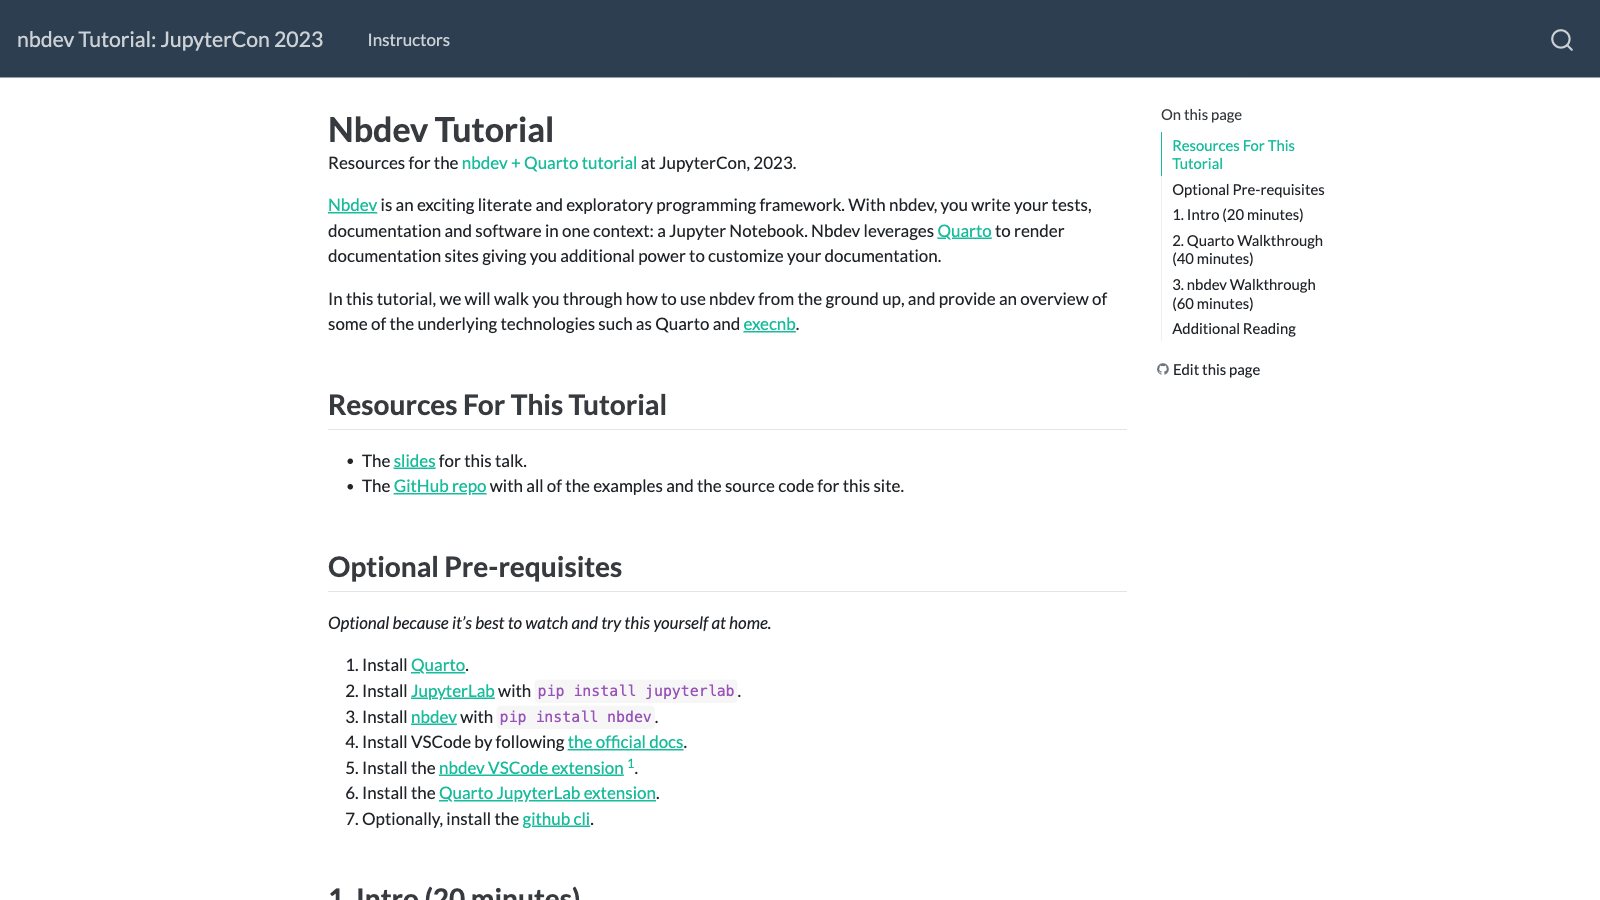

In [36]:
#| echo: false
from IPython.display import Image
Image(filename="../posts/images/jupytercon-2023-tutorial.png")

I want a resolution of 1600x900 but the font size is too small here. Halving the width and height and doubling the device scale factor with the `--retina` flag should fix this:

In [37]:
#| output: false
!shot-scraper https://fastai.github.io/jupytercon-2023/ --output ../posts/images/jupytercon-2023-tutorial.png --width 800 --height 450 --retina

Screenshot of 'https://fastai.github.io/jupytercon-2023/' written to '../posts/images/jupytercon-2023-tutorial.png'


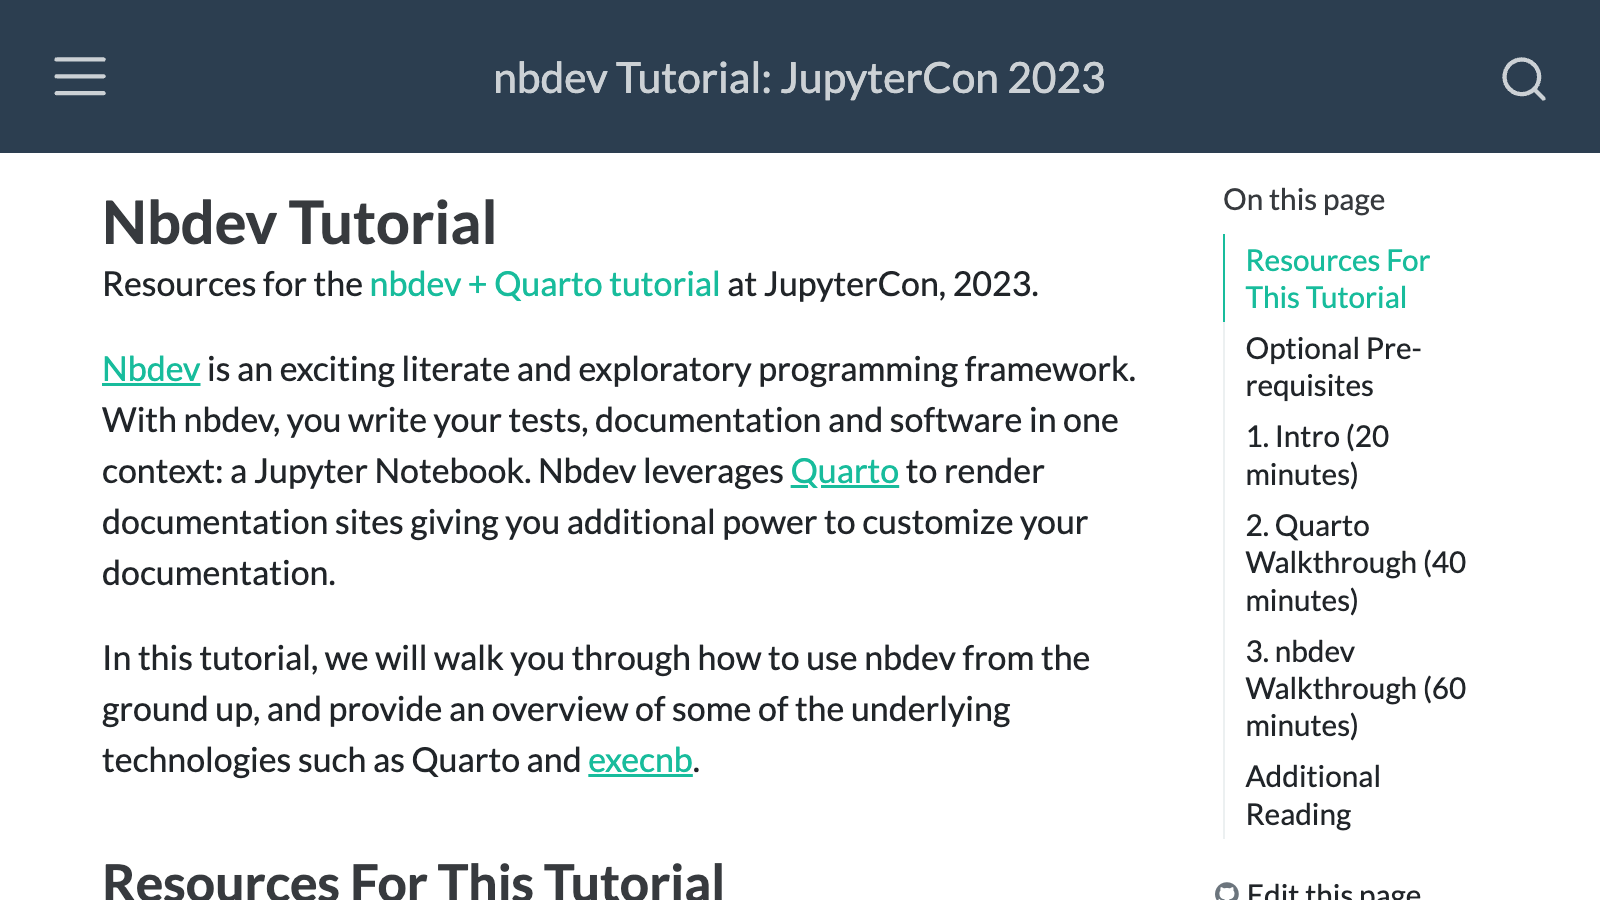

In [38]:
#| echo: false
Image(filename="../posts/images/jupytercon-2023-tutorial.png")

Finally, I want to exclude the nav bar. We can use a CSS selector for that:

In [39]:
#| output: false
!shot-scraper https://fastai.github.io/jupytercon-2023/ --output ../posts/images/jupytercon-2023-tutorial.png --selector '#quarto-content' --width 800 --height 450 --retina

Screenshot of '#quarto-content' on 'https://fastai.github.io/jupytercon-2023/' written to '../posts/images/jupytercon-2023-tutorial.png'


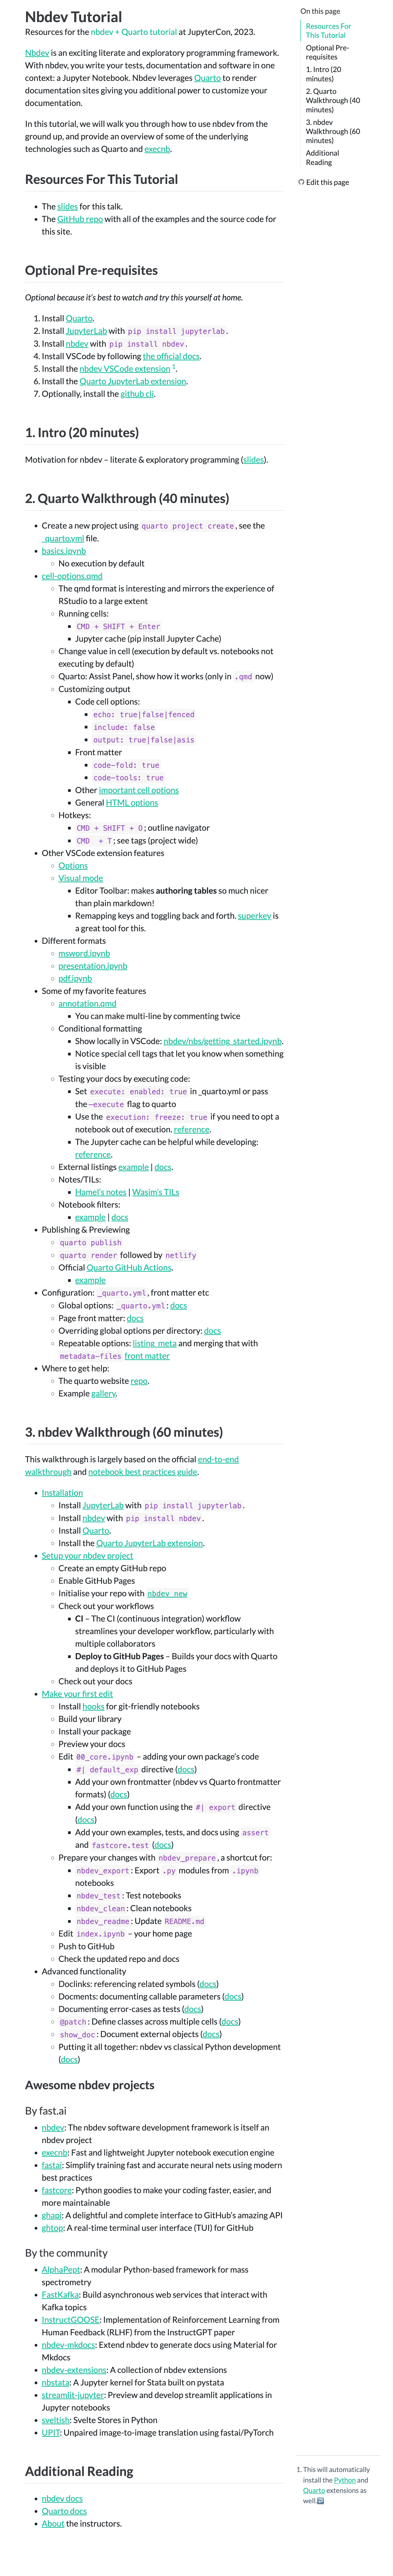

In [40]:
#| echo: false
Image(filename="../posts/images/jupytercon-2023-tutorial.png")

Ah, it doesn't seem like `--selector` works together with `--width` and `--height`. Another way to do this might be by hiding the navbar by executing `--javascript` code:

In [44]:
#| output: false
!shot-scraper https://fastai.github.io/jupytercon-2023/ --output ../posts/images/jupytercon-2023-tutorial.png --width 800 --height 450 --retina --javascript "document.querySelector('#quarto-header').style.display = 'none'"

Screenshot of 'https://fastai.github.io/jupytercon-2023/' written to '../posts/images/jupytercon-2023-tutorial.png'


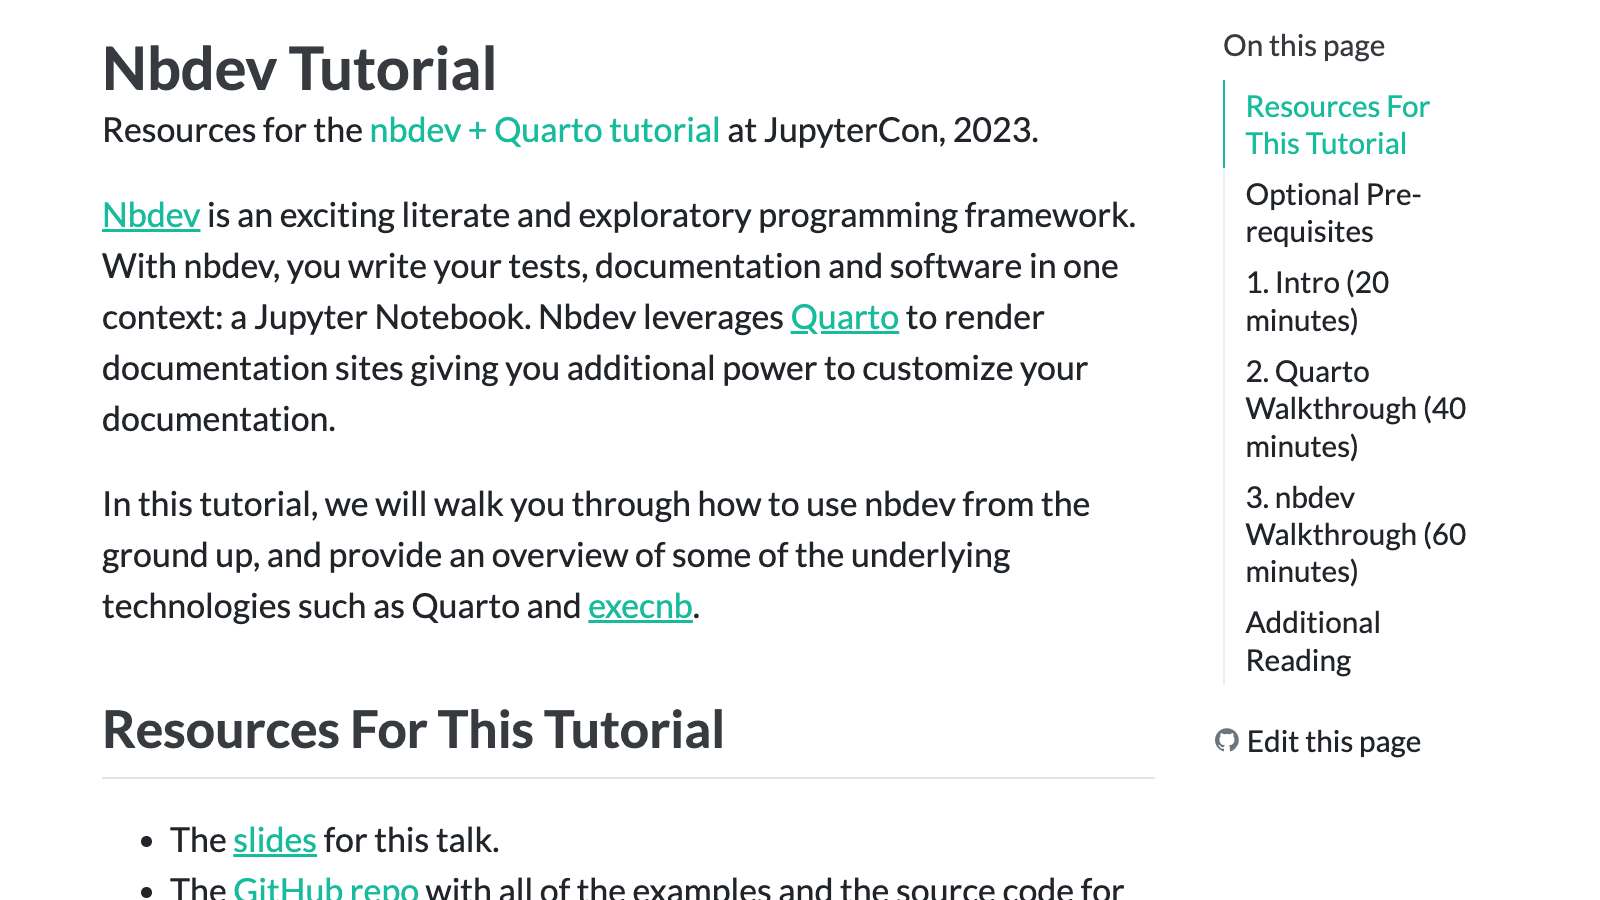

In [45]:
#| echo: false
Image(filename="../posts/images/jupytercon-2023-tutorial.png")

Perfect! I'm chuffed with how easy this was. I typed this out exactly as I used it, and everything worked first time with zero errors. I think it would've been neat if I could use `--width` and `--height` to crop the image after a `--selector` is applied, but in the end I could get what I wanted using a single line of `--javascript`.